In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import svm

In [36]:
#Dataset 불러오기
df = pd.read_csv('happydata.csv')

In [3]:
#Data 확인
print(df.head())
print(df.shape)
print(df.info())

   infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0          3          3              3            4              2       4   
1          3          2              3            5              4       3   
2          5          3              3            3              3       5   
3          5          4              3            3              3       5   
4          5          4              3            3              3       5   

   happy  
0      0  
1      0  
2      1  
3      0  
4      0  
(143, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy      

In [4]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [5]:
# CHECKING FOR NULL VALUES
df.isnull().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

In [37]:
df.duplicated().sum()

18

In [38]:
df.drop_duplicates()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
5,5,5,3,5,5,5,1
...,...,...,...,...,...,...,...
137,5,2,3,4,4,3,1
138,5,3,3,1,3,5,0
139,5,2,3,4,2,5,1
141,4,3,3,4,4,5,0


<AxesSubplot:xlabel='happy'>

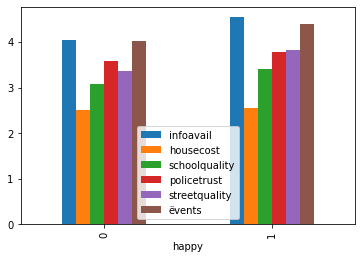

In [8]:
df.groupby('happy').mean().plot(kind='bar')

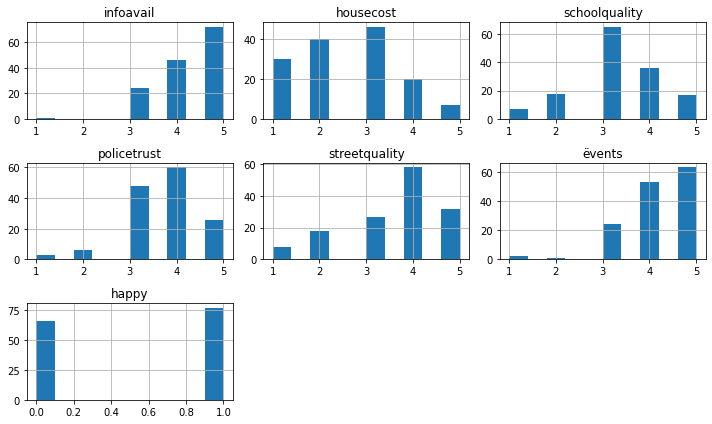

In [9]:
# Create histograms for each variable
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

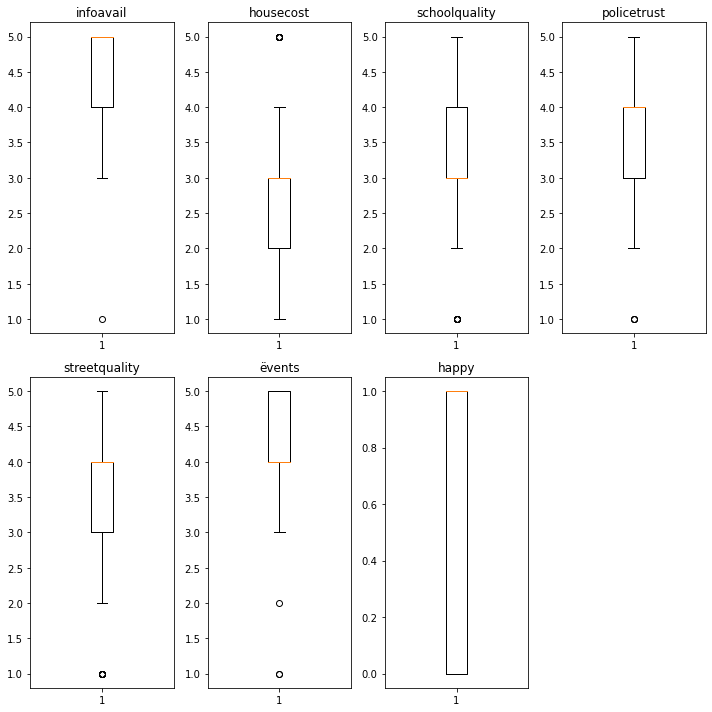

In [10]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
# Flatten the axes array to iterate over subplots
axes = axes.flatten()

categorical_cols = df.columns[df.dtypes == object]
numberic_cols = [x for x in df.columns if x not in categorical_cols]
# Plot boxplots for each column
for i, column in enumerate(numberic_cols):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(numberic_cols), len(axes)):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [24]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [51]:
x = df.iloc[:,:6]
x_train, x_test, y_train, y_test = train_test_split(x , df["happy"],
                                                    test_size=0.3,
                                                    random_state=0)

x_train.shape, x_test.shape

((100, 6), (43, 6))

In [52]:
from sklearn.svm import SVC

# 5. Fit K Neighbours Classifier to the training set
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)

# 6. Check Accuracy Score
print("Model : SVM")
print(confusion_matrix(y_test, guesses))
print("Accuracy : ",end="")
print(metrics.accuracy_score(y_test, guesses))

Model : SVM
[[ 5 14]
 [ 4 20]]
Accuracy : 0.5813953488372093


In [53]:
x = df.iloc[:,:6]
x_train, x_test, y_train, y_test = train_test_split(x , df["happy"],
                                                    test_size=0.2,
                                                    random_state=0)

x_train.shape, x_test.shape

((114, 6), (29, 6))

In [54]:
from sklearn.svm import SVC

# 5. Fit K Neighbours Classifier to the training set
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)

print(guesses)

# 6. Check Accuracy Score
print("Model : SVM")
print(confusion_matrix(y_test, guesses))
print("Accuracy : ",end="")
print(metrics.accuracy_score(y_test, guesses))

[1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0]
Model : SVM
[[ 6  8]
 [ 3 12]]
Accuracy : 0.6206896551724138


<AxesSubplot:ylabel='housecost'>

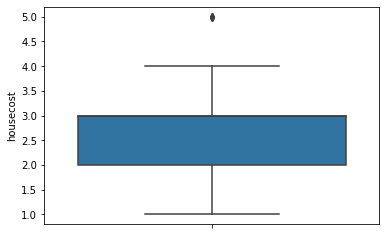

In [55]:
sns.boxplot(y = df['housecost'] )

<AxesSubplot:ylabel='housecost'>

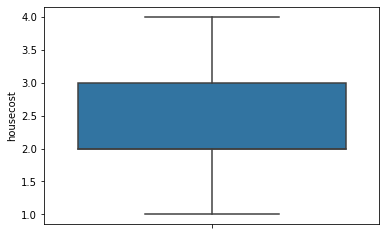

In [57]:
df.drop(df[df.housecost >= 4.5].index, inplace = True)
sns.boxplot(y = df['housecost'] )

In [58]:
x = df.iloc[:,:6]
x_train, x_test, y_train, y_test = train_test_split(x , df["happy"],
                                                    test_size=0.2,
                                                    random_state=0)

# 5. Fit K Neighbours Classifier to the training set
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train)
guesses = classifier.predict(x_test)

# 6. Check Accuracy Score
print("Model : SVM")
print(confusion_matrix(y_test, guesses))
print("Accuracy : ",end="")
print(metrics.accuracy_score(y_test, guesses))

Model : SVM
[[ 5  4]
 [ 7 12]]
Accuracy : 0.6071428571428571


<AxesSubplot:ylabel='infoavail'>

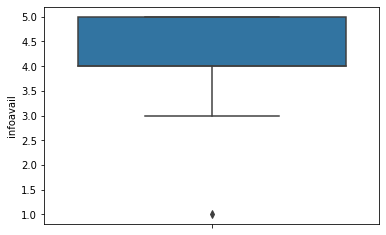

In [61]:
sns.boxplot(y = df['infoavail'])